In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split

# For Feature Scaling (It is helpful for lasso regression too:- For Lasso, it is important that the features are within the similar scale)
from sklearn.preprocessing import MinMaxScaler

# To save the trained scaler class
import joblib


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('kc_house_data.csv')
print(data.shape)

data.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Feature dtypes

In [4]:
data['zipcode'] = data['zipcode'].astype('O')
print("Data type of zipcode is: ", data['zipcode'].dtype)

Data type of zipcode is:  object


In [5]:
data['date'] = pd.to_datetime(data['date'])
print("Data type of date feature is: ", data['date'].dtypes)

Data type of date feature is:  datetime64[ns]


In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Seperating Train and Test Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['id', 'price'], axis=1),
    data.price,
    test_size=0.3,
    random_state=0
)

In [8]:
X_train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1468,2014-05-29,4,1.50,1390,7200,1.0,0,0,3,7,1140,250,1965,0,98133,47.7224,-122.332,1630,7702
15590,2015-03-17,3,1.50,1450,7316,1.0,0,0,3,7,1450,0,1961,0,98133,47.7725,-122.349,1440,7316
18552,2014-08-11,5,2.75,2860,5379,2.0,0,0,3,9,2860,0,2005,0,98052,47.7082,-122.104,2980,6018
10535,2014-09-26,2,1.00,1050,4125,1.0,0,0,4,7,1050,0,1909,0,98144,47.5736,-122.307,1650,4125
1069,2014-07-10,2,1.00,1240,57000,1.0,0,0,3,7,1240,0,1962,0,98075,47.5970,-122.059,3050,25545


In [9]:
y_train.head()

1468     400000.0
15590    430000.0
18552    720000.0
10535    392500.0
1069     505000.0
Name: price, dtype: float64

# Feature Engineering

## The Target Variable

In [10]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [11]:
print(y_train.head())

1468     12.899220
15590    12.971540
18552    13.487006
10535    12.880292
1069     13.132314
Name: price, dtype: float64


In [12]:
print(y_test.head())

17384    12.601487
722      14.271669
2680     13.239435
18754    13.355853
14554    13.567049
Name: price, dtype: float64


## Variable Types

In [13]:
categorical_features = [feature for feature in X_train.columns if X_train[feature].dtype == 'O']
categorical_features

['zipcode']

In [14]:
numerical_features = [feature for feature in X_train.columns if feature not in categorical_features and feature != 'price' and feature != 'date']
numerical_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [15]:
temporal_features = [feature for feature in X_train.columns if feature not in categorical_features + numerical_features and feature != 'price' or 'yr' in feature]
temporal_features

['date', 'yr_built', 'yr_renovated']

## Temporal Variables

In [16]:
def elapsed_years(df, feature):
    df[feature] = df[feature] - df['yr_built'] 
    filtering_yr_renovated = df[feature].apply(lambda x: x if (x > 0) else 0)
    df[feature] = filtering_yr_renovated
    
    return df
    
X_train = elapsed_years(X_train, 'yr_renovated')
X_test = elapsed_years(X_test, 'yr_renovated')

In [17]:
X_train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1468,2014-05-29,4,1.50,1390,7200,1.0,0,0,3,7,1140,250,1965,0,98133,47.7224,-122.332,1630,7702
15590,2015-03-17,3,1.50,1450,7316,1.0,0,0,3,7,1450,0,1961,0,98133,47.7725,-122.349,1440,7316
18552,2014-08-11,5,2.75,2860,5379,2.0,0,0,3,9,2860,0,2005,0,98052,47.7082,-122.104,2980,6018
10535,2014-09-26,2,1.00,1050,4125,1.0,0,0,4,7,1050,0,1909,0,98144,47.5736,-122.307,1650,4125
1069,2014-07-10,2,1.00,1240,57000,1.0,0,0,3,7,1240,0,1962,0,98075,47.5970,-122.059,3050,25545


In [18]:
X_train['yr_renovated'].unique()

array([  0,  29,  23,  32,  22,  36,  76,  57,  67,  85,  44,  70,  33,
        92,  81,  66,  49,  62,  68,  37,  88,  52,  54,  77,  71,  48,
        91, 108,  61,  34,  25,  64,  18,  38,  35,  50, 107,  80,  82,
        75, 101,  51,  45,   8,  86,  84,  40,  53,  46,  60,  94,  24,
        58,  12,  98,  59,  30,  56,  47,  28,  87,  27,  17, 102,   9,
        63,  89,  79,  72,  15,  11,  55,  69,  74,  14,  41,  43,  78,
        16,  13,  90, 114,  99,  93,  42,  21,  26, 100,  65,  31,  83,
        97,  96, 105,  19,  73,  20, 109,  95, 113, 104,  39,  10,   6,
       103, 110], dtype=int64)

## Numerical Features Transformations

### Yeo-Johnson Transformation

In [19]:
yeojohnson_parameters = {}

for feature in ['sqft_living', 'sqft_above', 'long', 'sqft_living15', 'lat']:
    X_train[feature], param = stats.yeojohnson(X_train[feature])
    
    yeojohnson_parameters[feature] = param
    
    X_test[feature] = stats.yeojohnson(X_test[feature], lmbda=param)

print(yeojohnson_parameters)

{'sqft_living': 0.02746906083863121, 'sqft_above': -0.2340673653378229, 'long': -72.1361607802877, 'sqft_living15': -0.2208076562054428, 'lat': 91.17515679003424}


C:\Users\neere\anaconda3\lib\site-packages\scipy\stats\morestats.py:1379: RuntimeWarning: overflow encountered in power
  out[~pos] = -(np.power(-x[~pos] + 1, 2 - lmbda) - 1) / (2 - lmbda)
C:\Users\neere\anaconda3\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\neere\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\neere\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2149: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Users\neere\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
C:\Users\neere\anaconda3\lib\site-packages\scipy\stats\morestats.py:1375: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] +

In [20]:
{'sqft_living': 0.9950858156753446, 'sqft_above': 0.6705003367495852, 'long': 0.9999999917053916, 'sqft_living15': 0.850941104817977, 'lat': 91.17515679003424}

{'sqft_living': 0.9950858156753446,
 'sqft_above': 0.6705003367495852,
 'long': 0.9999999917053916,
 'sqft_living15': 0.850941104817977,
 'lat': 91.17515679003424}

### Log Transformation

In [21]:
for feature in ['sqft_lot', 'sqft_lot15']:
    X_train[feature] = np.log(X_train[feature])
    X_test[feature] = np.log(X_test[feature])

### Binarizing the skewed feature

In [22]:
X_train[feature] = np.where(X_train['sqft_basement']==0, 0, 1)
X_test[feature] = np.where(X_test['sqft_basement']==0, 0, 1)

## Removing Rare Labels

In [23]:
def find_frequent_labels(df, feature, rare_percentage):
    df = df.copy()
    
    temp_data = df.groupby(feature)[feature].count() / len(df)
    
    return temp_data[temp_data > rare_percentage].index # we are returning non rare features.

for feature in ['zipcode']:
    frequent_list = find_frequent_labels(X_train, feature, 0.01)
    
    print(feature, frequent_list)
    print()
    
    # Replace rare categories by the string "Rare"
    # We are checking the value is in frequent list or not, if it is in list we will keep the value else replace with 'Rare'
    X_train[feature] = np.where(X_train[feature].isin(frequent_list), X_train[feature], 'Rare')
    X_test[feature] = np.where(X_test[feature].isin(frequent_list), X_test[feature], 'Rare')
    

zipcode Int64Index([98001, 98003, 98004, 98006, 98008, 98022, 98023, 98027, 98028,
            98029, 98030, 98031, 98033, 98034, 98038, 98040, 98042, 98045,
            98052, 98053, 98055, 98056, 98058, 98059, 98065, 98072, 98074,
            98075, 98092, 98103, 98105, 98106, 98107, 98112, 98115, 98116,
            98117, 98118, 98122, 98125, 98126, 98133, 98136, 98144, 98146,
            98155, 98166, 98168, 98177, 98178, 98198, 98199],
           dtype='int64', name='zipcode')



## Checking for Missing Values in both train and test

In [24]:
[feature for feature in X_train.columns if X_train[feature].isnull().sum() > 0 ]

[]

In [25]:
[feature for feature in X_test.columns if X_test[feature].isnull().sum() > 0 ]

[]

## Encoding Categorical variables

In [26]:
"""
This function will assgin discrete values to the strings of the variables, so that the smaller values
corresponds to the category that shows the smaller mean house price.
"""

def replace_categories(train, test, y_train, feature, target):
    temp_data = pd.concat([X_train, y_train], axis=1)
    
    # Order the categories in a feature from that with the lowest house sale price, to that with the highest
    ordered_labels = temp_data.groupby([feature])[target].mean().sort_values().index
    
    # Creating a dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
    
    print(feature, ordinal_label)
    print()
    
    # Use the dictionary to replace the categorical strings by integers
    train[feature] = train[feature].map(ordinal_label)
    test[feature] = test[feature].map(ordinal_label)
    

In [27]:
replace_categories(X_train, X_test, y_train, 'zipcode', 'price')

zipcode {98168: 0, 98001: 1, 98023: 2, 98198: 3, 98003: 4, 98030: 5, 98055: 6, 98178: 7, 98031: 8, 98146: 9, 98022: 10, 98042: 11, 98106: 12, 98092: 13, 98058: 14, 98038: 15, 98133: 16, 98118: 17, 98056: 18, 98155: 19, 98126: 20, 98045: 21, 98166: 22, 98125: 23, 98028: 24, 98059: 25, 'Rare': 26, 98034: 27, 98065: 28, 98136: 29, 98072: 30, 98144: 31, 98117: 32, 98103: 33, 98107: 34, 98027: 35, 98116: 36, 98008: 37, 98122: 38, 98115: 39, 98029: 40, 98177: 41, 98052: 42, 98053: 43, 98074: 44, 98033: 45, 98199: 46, 98075: 47, 98006: 48, 98105: 49, 98112: 50, 98040: 51, 98004: 52}



In [28]:
X_train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1468,2014-05-29,4,1.50,8.007417,8.881836,1.0,0,0,3,7,3.449940,250,1965,0,16,8.299460e+151,-1.426592e+153,3.644423,1
15590,2015-03-17,3,1.50,8.058965,8.897819,1.0,0,0,3,7,3.494925,0,1961,0,16,9.114763e+151,-1.441244e+153,3.619902,0
18552,2014-08-11,5,2.75,8.895958,8.590258,2.0,0,0,3,9,3.609141,0,2005,0,42,8.081794e+151,-1.243722e+153,3.754687,0
10535,2014-09-26,2,1.00,7.666799,8.324821,1.0,0,0,4,7,3.433972,0,1909,0,31,6.279637e+151,-1.405311e+153,3.646800,0
1069,2014-07-10,2,1.00,7.868431,10.950807,1.0,0,0,3,7,3.465953,0,1962,0,47,6.561535e+151,-1.210463e+153,3.758645,0


### Monotonic Relationship between Categorical and Target features.

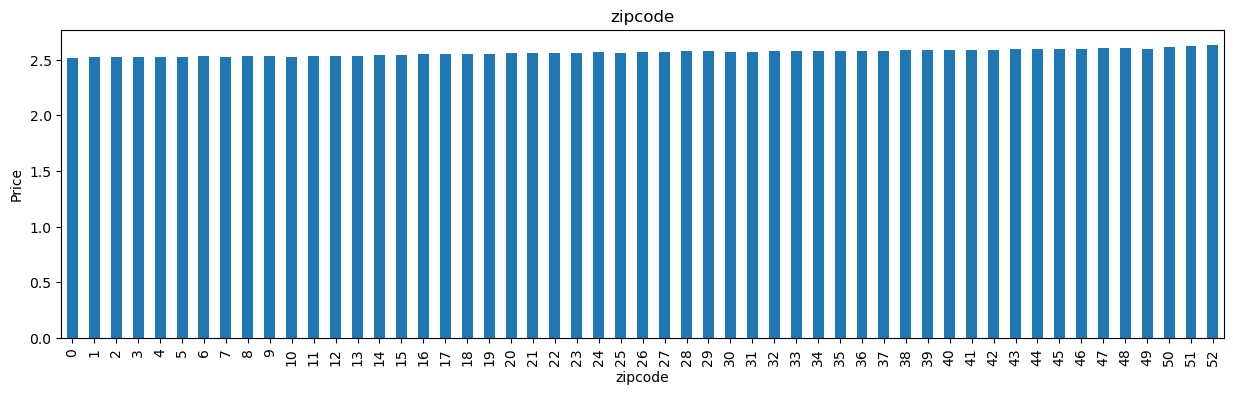

In [29]:
def analyse_vars(train, y_train, feature):
    
    # Function plots median house sale price per encoded category
    temp_data = pd.concat([X_train, np.log(y_train)], axis=1)
    
    plt.figure(figsize=(15,4))
    temp_data.groupby(feature)['price'].median().plot.bar()
    plt.title(feature)
    plt.ylabel('Price')
    plt.show()


analyse_vars(X_train, y_train, 'zipcode')

## Creating new features from date feature

In [30]:
X_train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1468,2014-05-29,4,1.50,8.007417,8.881836,1.0,0,0,3,7,3.449940,250,1965,0,16,8.299460e+151,-1.426592e+153,3.644423,1
15590,2015-03-17,3,1.50,8.058965,8.897819,1.0,0,0,3,7,3.494925,0,1961,0,16,9.114763e+151,-1.441244e+153,3.619902,0
18552,2014-08-11,5,2.75,8.895958,8.590258,2.0,0,0,3,9,3.609141,0,2005,0,42,8.081794e+151,-1.243722e+153,3.754687,0
10535,2014-09-26,2,1.00,7.666799,8.324821,1.0,0,0,4,7,3.433972,0,1909,0,31,6.279637e+151,-1.405311e+153,3.646800,0
1069,2014-07-10,2,1.00,7.868431,10.950807,1.0,0,0,3,7,3.465953,0,1962,0,47,6.561535e+151,-1.210463e+153,3.758645,0


In [31]:
month_from_date = X_train['date'].dt.month
day_from_date = X_train['date'].dt.day
year_from_date = X_train['date'].dt.year
month_name = X_train['date'].dt.month_name()

X_train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1468,2014-05-29,4,1.50,8.007417,8.881836,1.0,0,0,3,7,3.449940,250,1965,0,16,8.299460e+151,-1.426592e+153,3.644423,1
15590,2015-03-17,3,1.50,8.058965,8.897819,1.0,0,0,3,7,3.494925,0,1961,0,16,9.114763e+151,-1.441244e+153,3.619902,0
18552,2014-08-11,5,2.75,8.895958,8.590258,2.0,0,0,3,9,3.609141,0,2005,0,42,8.081794e+151,-1.243722e+153,3.754687,0
10535,2014-09-26,2,1.00,7.666799,8.324821,1.0,0,0,4,7,3.433972,0,1909,0,31,6.279637e+151,-1.405311e+153,3.646800,0
1069,2014-07-10,2,1.00,7.868431,10.950807,1.0,0,0,3,7,3.465953,0,1962,0,47,6.561535e+151,-1.210463e+153,3.758645,0


In [32]:
X_train = X_train.assign(
    month = month_from_date,
    day = day_from_date,
    year = year_from_date,
    month_name = month_name
)

In [33]:
X_train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,day,year,month_name
1468,2014-05-29,4,1.50,8.007417,8.881836,1.0,0,0,3,7,3.449940,250,1965,0,16,8.299460e+151,-1.426592e+153,3.644423,1,5,29,2014,May
15590,2015-03-17,3,1.50,8.058965,8.897819,1.0,0,0,3,7,3.494925,0,1961,0,16,9.114763e+151,-1.441244e+153,3.619902,0,3,17,2015,March
18552,2014-08-11,5,2.75,8.895958,8.590258,2.0,0,0,3,9,3.609141,0,2005,0,42,8.081794e+151,-1.243722e+153,3.754687,0,8,11,2014,August
10535,2014-09-26,2,1.00,7.666799,8.324821,1.0,0,0,4,7,3.433972,0,1909,0,31,6.279637e+151,-1.405311e+153,3.646800,0,9,26,2014,September
1069,2014-07-10,2,1.00,7.868431,10.950807,1.0,0,0,3,7,3.465953,0,1962,0,47,6.561535e+151,-1.210463e+153,3.758645,0,7,10,2014,July


In [34]:
month_from_date = X_test['date'].dt.month
day_from_date = X_test['date'].dt.day
year_from_date = X_test['date'].dt.year
month_name = X_test['date'].dt.month_name()

In [35]:
X_test = X_test.assign(
    month = month_from_date,
    day = day_from_date,
    year = year_from_date,
    month_name = month_name
)

In [36]:
X_test.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,day,year,month_name
17384,2014-10-29,2,1.50,8.042017,7.408531,3.0,0,0,3,7,3.492396,0,1999,0,23,8.296355e+151,-1.391020e+153,3.618503,0,10,29,2014,October
722,2014-08-08,4,3.25,9.510073,10.855840,2.0,0,0,4,12,3.681026,0,1988,0,26,7.046213e+151,-1.289472e+153,3.812290,0,8,8,2014,August
2680,2014-06-25,2,0.75,8.050520,8.216088,1.0,0,0,3,7,3.459746,240,1914,0,34,7.533742e+151,-1.454295e+153,3.619902,1,6,25,2014,June
18754,2014-06-24,2,1.00,7.755699,7.878534,1.0,0,0,4,8,3.448244,0,1927,0,26,7.163409e+151,-1.448190e+153,3.650300,0,6,24,2014,June
14554,2015-04-26,4,2.50,9.028083,9.169831,2.0,0,2,3,9,3.625395,0,2002,0,19,9.101142e+151,-1.380188e+153,3.719761,0,4,26,2015,April


In [37]:
replace_categories(X_train, X_test, y_train, 'month_name', 'price')

month_name {'January': 0, 'February': 1, 'November': 2, 'December': 3, 'September': 4, 'October': 5, 'March': 6, 'August': 7, 'July': 8, 'May': 9, 'June': 10, 'April': 11}



## Dropping date feature

In [38]:
X_train.drop('date', axis=1, inplace=True)
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,day,year,month_name
1468,4,1.50,8.007417,8.881836,1.0,0,0,3,7,3.449940,250,1965,0,16,8.299460e+151,-1.426592e+153,3.644423,1,5,29,2014,9
15590,3,1.50,8.058965,8.897819,1.0,0,0,3,7,3.494925,0,1961,0,16,9.114763e+151,-1.441244e+153,3.619902,0,3,17,2015,6
18552,5,2.75,8.895958,8.590258,2.0,0,0,3,9,3.609141,0,2005,0,42,8.081794e+151,-1.243722e+153,3.754687,0,8,11,2014,7
10535,2,1.00,7.666799,8.324821,1.0,0,0,4,7,3.433972,0,1909,0,31,6.279637e+151,-1.405311e+153,3.646800,0,9,26,2014,4
1069,2,1.00,7.868431,10.950807,1.0,0,0,3,7,3.465953,0,1962,0,47,6.561535e+151,-1.210463e+153,3.758645,0,7,10,2014,8


In [39]:
X_test.drop('date', axis=1, inplace=True)
X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,day,year,month_name
17384,2,1.50,8.042017,7.408531,3.0,0,0,3,7,3.492396,0,1999,0,23,8.296355e+151,-1.391020e+153,3.618503,0,10,29,2014,5
722,4,3.25,9.510073,10.855840,2.0,0,0,4,12,3.681026,0,1988,0,26,7.046213e+151,-1.289472e+153,3.812290,0,8,8,2014,7
2680,2,0.75,8.050520,8.216088,1.0,0,0,3,7,3.459746,240,1914,0,34,7.533742e+151,-1.454295e+153,3.619902,1,6,25,2014,10
18754,2,1.00,7.755699,7.878534,1.0,0,0,4,8,3.448244,0,1927,0,26,7.163409e+151,-1.448190e+153,3.650300,0,6,24,2014,10
14554,4,2.50,9.028083,9.169831,2.0,0,2,3,9,3.625395,0,2002,0,19,9.101142e+151,-1.380188e+153,3.719761,0,4,26,2015,11


## Feature Scaling

In [40]:
scaler = MinMaxScaler()

# Fit the scaler to the training set.
scaler.fit(X_train)

# Transform the train and test set.

# returns numpy array , so we wrap the array with pandas Dataframe.
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)




In [41]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,day,year,month_name
0,0.121212,0.18750,0.394705,0.325923,0.0,0.0,0.0,0.50,0.500000,0.491606,0.051867,0.565217,0.0,0.307692,0.857739,0.201163,0.589897,1.0,0.363636,0.933333,0.0,0.818182
1,0.090909,0.18750,0.405596,0.327905,0.0,0.0,0.0,0.50,0.500000,0.562964,0.000000,0.530435,0.0,0.307692,0.986239,0.183278,0.544952,0.0,0.181818,0.533333,1.0,0.545455
2,0.151515,0.34375,0.582438,0.289762,0.4,0.0,0.0,0.50,0.666667,0.744138,0.000000,0.913043,0.0,0.807692,0.823433,0.424382,0.792008,0.0,0.636364,0.333333,0.0,0.636364
3,0.060606,0.12500,0.322738,0.256842,0.0,0.0,0.0,0.75,0.500000,0.466276,0.000000,0.078261,0.0,0.596154,0.539395,0.227139,0.594254,0.0,0.727273,0.833333,0.0,0.363636
4,0.060606,0.12500,0.365339,0.582515,0.0,0.0,0.0,0.50,0.500000,0.517006,0.000000,0.539130,0.0,0.903846,0.583825,0.464978,0.799262,0.0,0.545455,0.300000,0.0,0.727273


In [42]:
X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,day,year,month_name
0,0.060606,0.18750,0.402015,0.143205,0.8,0.0,0.0,0.50,0.500000,0.558951,0.000000,0.860870,0.0,0.442308,0.857250,0.244583,0.542388,0.0,0.818182,0.933333,0.0,0.454545
1,0.121212,0.40625,0.712189,0.570737,0.4,0.0,0.0,0.75,0.916667,0.858167,0.000000,0.765217,0.0,0.500000,0.660215,0.368537,0.897592,0.0,0.636364,0.233333,0.0,0.636364
2,0.060606,0.09375,0.403812,0.243357,0.0,0.0,0.0,0.50,0.500000,0.507160,0.049793,0.121739,0.0,0.653846,0.737054,0.167347,0.544952,1.0,0.454545,0.800000,0.0,0.909091
3,0.060606,0.12500,0.341521,0.201494,0.0,0.0,0.0,0.75,0.583333,0.488915,0.000000,0.234783,0.0,0.500000,0.678686,0.174799,0.600670,0.0,0.454545,0.766667,0.0,0.909091
4,0.121212,0.31250,0.610354,0.361640,0.4,0.0,0.5,0.50,0.666667,0.769922,0.000000,0.886957,0.0,0.365385,0.984092,0.257805,0.727989,0.0,0.272727,0.833333,1.0,1.000000


# Saving train and test data

In [43]:
X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)

y_train.to_csv('ytrain.csv', index=False)
y_test.to_csv('ytest.csv', index=False)


# Saving the scalar

In [44]:
joblib.dump(scaler, 'minmax_scalar.joblib')

['minmax_scalar.joblib']